# Introduction

# Read Data

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# read in data and check basic info
def read_check_data(file_path):
    data = pd.read_csv(file_path)
    print('Training data shape: ', data.shape)
    print(data.head())
    return data

In [8]:
app_train = read_check_data("./data/application_train.csv")

Training data shape:  (307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0           

In [9]:
POS_CASH_balance = read_check_data("./data/POS_CASH_balance.csv")

Training data shape:  (10001358, 8)
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  


In [11]:
bureau_balance = read_check_data("./data/bureau_balance.csv")

Training data shape:  (27299925, 3)
   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


In [13]:
previous_application = read_check_data("./data/previous_application.csv")

Training data shape:  (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS

In [14]:
credit_card_balance = read_check_data("./data/previous_application.csv")

Training data shape:  (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS

In [16]:
bureau = read_check_data("./data/bureau.csv")

Training data shape:  (1716428, 17)
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0  

# Check Missing Values

In [74]:
def check_missing_col(df):
    missing_num = df.isnull().sum().sort_values(ascending = False)
    minssing_percent = (df.isnull().mean()*100).sort_values(ascending = False)
    missing_info  = pd.concat([missing_num, minssing_percent], axis=1, keys=['missing_num', 'minssing_percent'])
    print(missing_info.head())
    return missing_info

In [77]:
def check_missing_row(df):
    missing_num = df.isnull().sum(axis=1).sort_values(ascending = False)
    minssing_percent = (df.isnull().mean(axis=1)*100).sort_values(ascending = False)
    missing_info  = pd.concat([missing_num, minssing_percent], axis=1, keys=['missing_num', 'minssing_percent'])
    print(missing_info.head())
    return missing_info

In [64]:
def missing_hist(missing_info):
    plt.hist(missing_info.minssing_percent)
    print(missing_info.describe())

                          missing_num  minssing_percent
COMMONAREA_MEDI                214865         69.872297
COMMONAREA_AVG                 214865         69.872297
COMMONAREA_MODE                214865         69.872297
NONLIVINGAPARTMENTS_MODE       213514         69.432963
NONLIVINGAPARTMENTS_MEDI       213514         69.432963
         missing_num  minssing_percent
count     122.000000        122.000000
mean    75020.204918         24.395942
std     87476.136655         28.446507
min         0.000000          0.000000
25%         0.000000          0.000000
50%      1021.000000          0.332021
75%    156271.000000         50.818020
max    214865.000000         69.872297


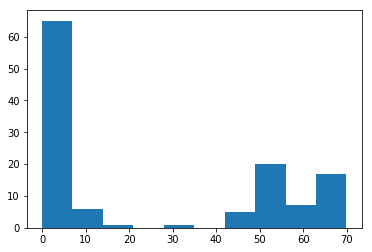

In [81]:
# check missing value of app_train
miss_app_train = check_missing_col(app_train)
missing_hist(miss_app_train)

        missing_num  minssing_percent
133770           61              50.0
244833           61              50.0
150206           61              50.0
69707            61              50.0
269786           61              50.0
         missing_num  minssing_percent
count  307511.000000     307511.000000
mean       29.763049         24.395942
std        20.919345         17.147004
min         0.000000          0.000000
25%         5.000000          4.098361
50%        36.000000         29.508197
75%        49.000000         40.163934
max        61.000000         50.000000


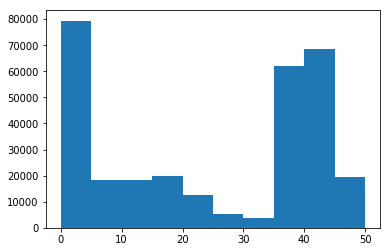

In [82]:
missing_hist(check_missing_row(app_train))

                       missing_num  minssing_percent
CNT_INSTALMENT_FUTURE        26087          0.260835
CNT_INSTALMENT               26071          0.260675
SK_DPD_DEF                       0          0.000000
SK_DPD                           0          0.000000
NAME_CONTRACT_STATUS             0          0.000000
        missing_num  minssing_percent
count      8.000000          8.000000
mean    6519.750000          0.065189
std    12072.231948          0.120706
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.000000
75%     6517.750000          0.065169
max    26087.000000          0.260835


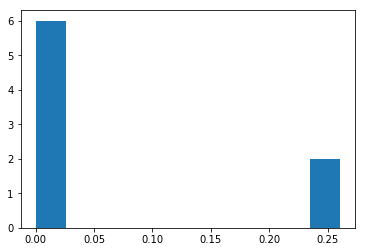

In [83]:
# check missing value of POS_CASH_balance
miss_POS_CASH = check_missing_col(POS_CASH_balance)
missing_hist(miss_POS_CASH)

         missing_num  minssing_percent
8095302            2              25.0
6099819            2              25.0
7188626            2              25.0
7188625            2              25.0
5799073            2              25.0
        missing_num  minssing_percent
count  1.000136e+07      1.000136e+07
mean   5.215092e-03      6.518865e-02
std    1.018921e-01      1.273651e+00
min    0.000000e+00      0.000000e+00
25%    0.000000e+00      0.000000e+00
50%    0.000000e+00      0.000000e+00
75%    0.000000e+00      0.000000e+00
max    2.000000e+00      2.500000e+01


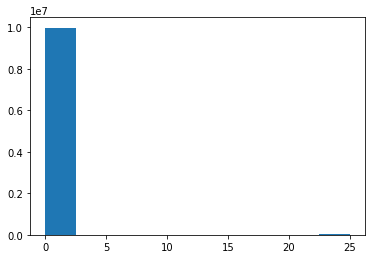

In [84]:
missing_hist(check_missing_row(POS_CASH_balance))

                missing_num  minssing_percent
STATUS                    0               0.0
MONTHS_BALANCE            0               0.0
SK_ID_BUREAU              0               0.0
       missing_num  minssing_percent
count          3.0               3.0
mean           0.0               0.0
std            0.0               0.0
min            0.0               0.0
25%            0.0               0.0
50%            0.0               0.0
75%            0.0               0.0
max            0.0               0.0


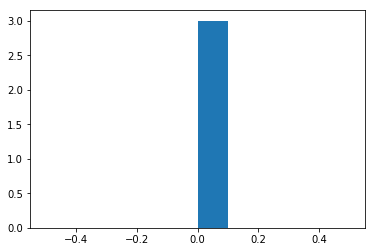

In [67]:
miss_bureau_balance = check_missing_col(bureau_balance)
missing_hist(miss_bureau_balance)

          missing_num  minssing_percent
27299924            0               0.0
9099834             0               0.0
9099966             0               0.0
9099967             0               0.0
9099968             0               0.0
       missing_num  minssing_percent
count   27299925.0        27299925.0
mean           0.0               0.0
std            0.0               0.0
min            0.0               0.0
25%            0.0               0.0
50%            0.0               0.0
75%            0.0               0.0
max            0.0               0.0


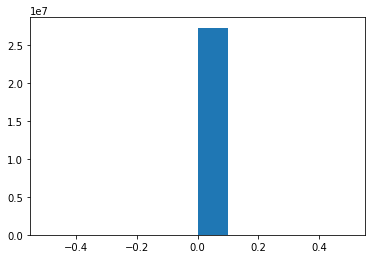

In [85]:
missing_hist(check_missing_row(bureau_balance))

                          missing_num  minssing_percent
RATE_INTEREST_PRIVILEGED      1664263         99.643698
RATE_INTEREST_PRIMARY         1664263         99.643698
RATE_DOWN_PAYMENT              895844         53.636480
AMT_DOWN_PAYMENT               895844         53.636480
NAME_TYPE_SUITE                820405         49.119754
        missing_num  minssing_percent
count  3.700000e+01         37.000000
mean   3.002523e+05         17.976877
std    4.602509e+05         27.556401
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    6.730650e+05         40.298129
max    1.664263e+06         99.643698


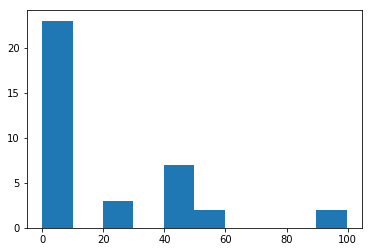

In [68]:
#check_missing(previous_application)
missing_hist(check_missing_col(previous_application))

        missing_num  minssing_percent
402355           15         40.540541
545870           15         40.540541
24543            15         40.540541
205845           15         40.540541
366790           15         40.540541
        missing_num  minssing_percent
count  1.670214e+06      1.670214e+06
mean   6.651445e+00      1.797688e+01
std    4.648636e+00      1.256388e+01
min    0.000000e+00      0.000000e+00
25%    2.000000e+00      5.405405e+00
50%    4.000000e+00      1.081081e+01
75%    1.100000e+01      2.972973e+01
max    1.500000e+01      4.054054e+01


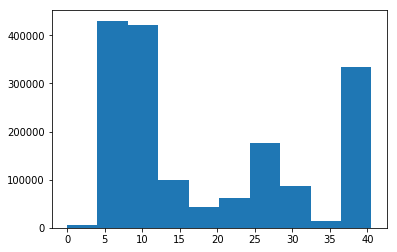

In [86]:
missing_hist(check_missing_row(previous_application))

                          missing_num  minssing_percent
RATE_INTEREST_PRIVILEGED      1664263         99.643698
RATE_INTEREST_PRIMARY         1664263         99.643698
RATE_DOWN_PAYMENT              895844         53.636480
AMT_DOWN_PAYMENT               895844         53.636480
NAME_TYPE_SUITE                820405         49.119754
        missing_num  minssing_percent
count  3.700000e+01         37.000000
mean   3.002523e+05         17.976877
std    4.602509e+05         27.556401
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    6.730650e+05         40.298129
max    1.664263e+06         99.643698


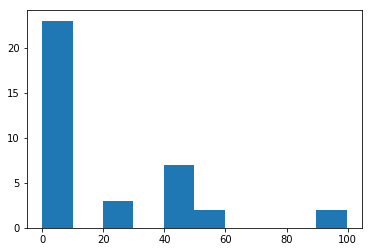

In [69]:
#check_missing(credit_card_balance)
missing_hist(check_missing_col(credit_card_balance))

        missing_num  minssing_percent
402355           15         40.540541
545870           15         40.540541
24543            15         40.540541
205845           15         40.540541
366790           15         40.540541
        missing_num  minssing_percent
count  1.670214e+06      1.670214e+06
mean   6.651445e+00      1.797688e+01
std    4.648636e+00      1.256388e+01
min    0.000000e+00      0.000000e+00
25%    2.000000e+00      5.405405e+00
50%    4.000000e+00      1.081081e+01
75%    1.100000e+01      2.972973e+01
max    1.500000e+01      4.054054e+01


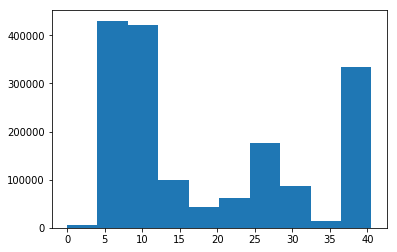

In [87]:
missing_hist(check_missing_row(credit_card_balance))

                        missing_num  minssing_percent
AMT_ANNUITY                 1226791         71.473490
AMT_CREDIT_MAX_OVERDUE      1124488         65.513264
DAYS_ENDDATE_FACT            633653         36.916958
AMT_CREDIT_SUM_LIMIT         591780         34.477415
AMT_CREDIT_SUM_DEBT          257669         15.011932
        missing_num  minssing_percent
count  1.700000e+01         17.000000
mean   2.317616e+05         13.502552
std    4.096962e+05         23.869116
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    2.576690e+05         15.011932
max    1.226791e+06         71.473490


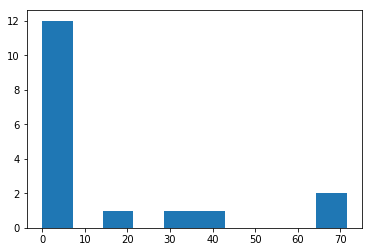

In [70]:
#check_missing(bureau)
missing_hist(check_missing_col(bureau))

        missing_num  minssing_percent
793046            6         35.294118
773821            6         35.294118
871866            6         35.294118
468959            6         35.294118
701505            6         35.294118
        missing_num  minssing_percent
count  1.716428e+06      1.716428e+06
mean   2.295434e+00      1.350255e+01
std    1.126084e+00      6.624026e+00
min    0.000000e+00      0.000000e+00
25%    1.000000e+00      5.882353e+00
50%    2.000000e+00      1.176471e+01
75%    3.000000e+00      1.764706e+01
max    6.000000e+00      3.529412e+01


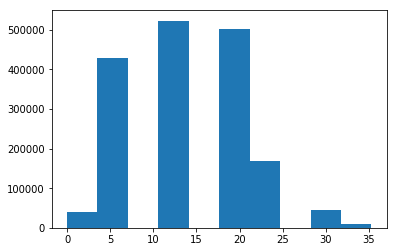

In [88]:
missing_hist(check_missing_row(bureau))

# Select and Re-Encode Features

In [89]:
def select_feature_type(df,data_type):
    return df.select_dtypes(include=[data_type])

In [91]:
def count_feature_type(df):
    return df.dtypes.value_counts()

In [93]:
def count_col_unique(df,data_type):
    '''data_type could be object,category'''
    return app_train.select_dtypes(data_type).apply(pd.Series.nunique, axis = 0)

In [92]:
count_feature_type(app_train)

float64    65
int64      41
object     16
dtype: int64

In [94]:
count_col_unique(app_train,'object')

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [56]:
app_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [57]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)